In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import scipy.stats as st
import seaborn as sns
from calendar import day_abbr, month_abbr, mdays
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objs as go
from sklearn.metrics import silhouette_score
import holidays
from calendar import day_abbr, month_abbr, mdays

In [2]:
def hourly_trend(df,attribute):
    hour_consumption =df.groupby(['hour']).mean()
    q25 = df.groupby(['hour']).quantile(0.25)
    q75 = df.groupby(['hour']).quantile(0.75)

    f, ax = plt.subplots(figsize=(10,7)) 
    hour_consumption.plot(ax=ax, lw=2, color='b', legend=False)
    ax.fill_between(hour_consumption.index, q25.values.ravel(), q75.values.ravel(), color='b', alpha=0.3)
    ax.grid(ls=':')
    ax.set_xlabel('Hour', fontsize=15)
    ax.set_ylabel( attribute, fontsize=15);
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

    ax.set_title('Hourly ' + attribute + ' consumption of HH', fontsize=15)
    plt.show()

In [4]:
df = pd.read_excel('output.xlsx', index_col = 1, parse_dates=True)
df.head()

,Unnamed: 0,HH Electrical (kWh),HH Chilled Water (kWh),HH LTHW (Heating) (kWh),HH CHW Capacity (m3),DE Electricity (kWh),DE LTHW (Heating) (kWh),DE CHW Capacity (m3),Unnamed: 8,Unnamed: 9
From Timestamp,,,,,,,,,,
2018-01-01 00:00:00,0,12.8,0.5498,3.6,0.0300,NaN,27.4,0.0,NaN,NaN
2018-01-01 00:30:00,1,12.3,0.5195,50.2,0.0200,NaN,28.3,0.0,NaN,NaN
2018-01-01 01:00:00,2,13.5,0.5742,50.2,0.0300,NaN,29.8,0.0,NaN,NaN
2018-01-01 01:30:00,3,11.9,0.5928,7.5,0.0199,NaN,27.3,0.0,NaN,NaN
2018-01-01 02:00:00,4,12.8,0.6143,0.0,0.0300,NaN,27.3,0.0,NaN,NaN


In [5]:
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour
df['month'] = df.index.month
df['time'] = df.index.time

df.drop(df.columns[[0, 8, 9]], axis = 1, inplace = True) #dropping empty columns generated by the previous program

df

,HH Electrical (kWh),HH Chilled Water (kWh),HH LTHW (Heating) (kWh),HH CHW Capacity (m3),DE Electricity (kWh),DE LTHW (Heating) (kWh),DE CHW Capacity (m3),dayofweek,hour,month,time
From Timestamp,,,,,,,,,,,
2018-01-01 00:00:00,12.80,0.5498,3.6,0.0300,NaN,27.4,0.0,0,0,1,00:00:00
2018-01-01 00:30:00,12.30,0.5195,50.2,0.0200,NaN,28.3,0.0,0,0,1,00:30:00
2018-01-01 01:00:00,13.50,0.5742,50.2,0.0300,NaN,29.8,0.0,0,1,1,01:00:00
2018-01-01 01:30:00,11.90,0.5928,7.5,0.0199,NaN,27.3,0.0,0,1,1,01:30:00
2018-01-01 02:00:00,12.80,0.6143,0.0,0.0300,NaN,27.3,0.0,0,2,1,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,13.56,0.7700,4.9,0.1899,227.0,16.8,0.0,1,21,12,21:30:00
2019-12-31 22:00:00,13.81,0.7200,12.9,0.1899,227.0,52.0,0.0,1,22,12,22:00:00
2019-12-31 22:30:00,14.12,0.6500,16.8,0.2002,226.0,14.6,0.0,1,22,12,22:30:00


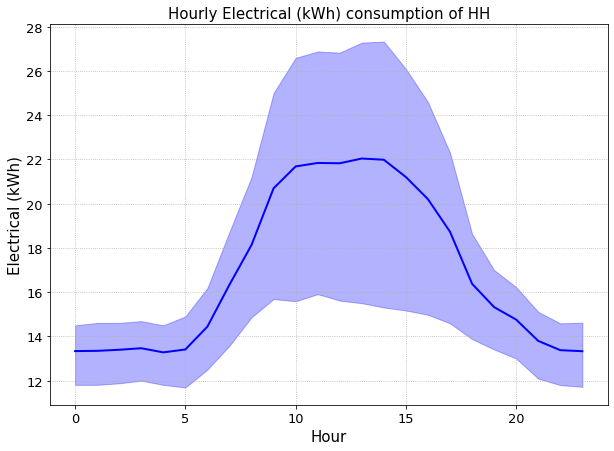

In [6]:
df_HH_elec = df[['HH Electrical (kWh)', 'hour']]
attribute = 'Electrical (kWh)'
hourly_trend(df_HH_elec,attribute)

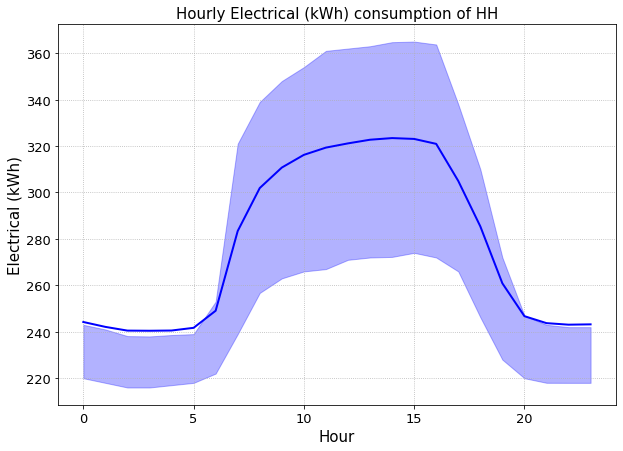

In [7]:
df_HH_elec = df[['DE Electricity (kWh)', 'hour']]
attribute = 'Electrical (kWh)'
hourly_trend(df_HH_elec,attribute)

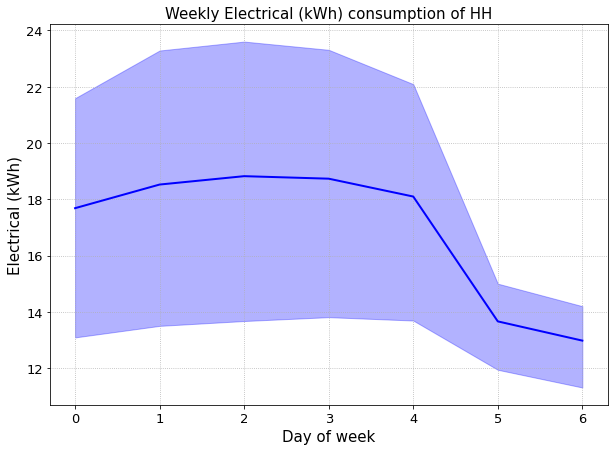

In [8]:
    df_HH_elec = df[['HH Electrical (kWh)', 'dayofweek']]
    attribute = 'Electrical (kWh)'
    dayofweek_consumption =df_HH_elec.groupby(['dayofweek']).mean()
    q25 = df_HH_elec.groupby(['dayofweek']).quantile(0.25)
    q75 = df_HH_elec.groupby(['dayofweek']).quantile(0.75)

    f, ax = plt.subplots(figsize=(10,7)) 
    dayofweek_consumption.plot(ax=ax, lw=2, color='b', legend=False)
    ax.fill_between(dayofweek_consumption.index, q25.values.ravel(), q75.values.ravel(), color='b', alpha=0.3)
    ax.grid(ls=':')
    ax.set_xlabel('Day of week', fontsize=15)
    ax.set_ylabel( attribute, fontsize=15);
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    

    ax.set_title('Weekly ' + attribute + ' consumption of HH', fontsize=15)
    plt.show()

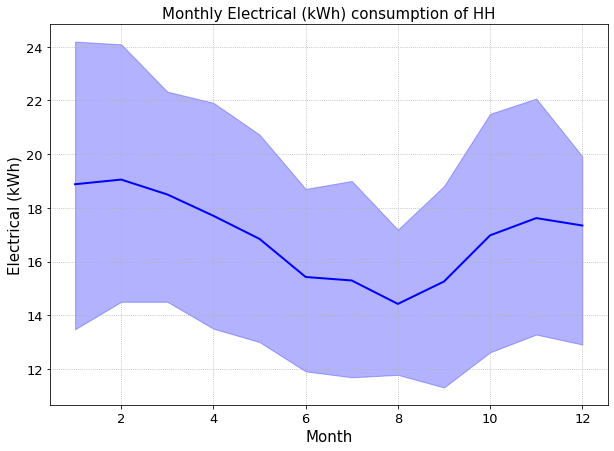

In [9]:
    df_HH_elec = df[['HH Electrical (kWh)', 'month']]
    attribute = 'Electrical (kWh)'
    dayofweek_consumption =df_HH_elec.groupby(['month']).mean()
    q25 = df_HH_elec.groupby(['month']).quantile(0.25)
    q75 = df_HH_elec.groupby(['month']).quantile(0.75)

    f, ax = plt.subplots(figsize=(10,7)) 
    dayofweek_consumption.plot(ax=ax, lw=2, color='b', legend=False)
    ax.fill_between(dayofweek_consumption.index, q25.values.ravel(), q75.values.ravel(), color='b', alpha=0.3)
    ax.grid(ls=':')
    ax.set_xlabel('Month', fontsize=15)
    ax.set_ylabel( attribute, fontsize=15);
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    

    ax.set_title('Monthly ' + attribute + ' consumption of HH', fontsize=15)
    plt.show()

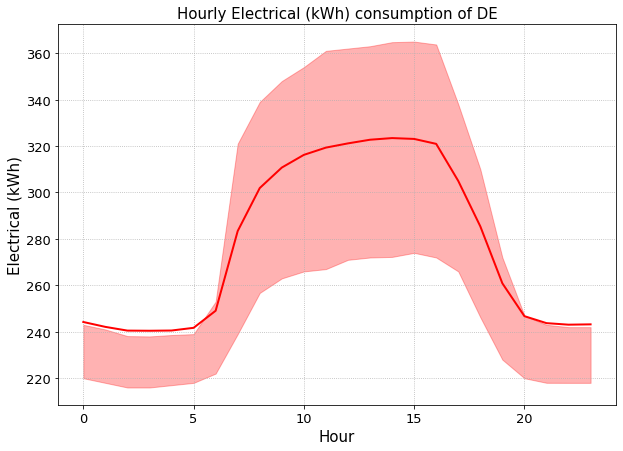

In [10]:
    df_DE_elec = df[['DE Electricity (kWh)', 'hour']]
    attribute = 'Electrical (kWh)'

    hour_consumption =df_DE_elec.groupby(['hour']).mean()
    q25 = df_DE_elec.groupby(['hour']).quantile(0.25)
    q75 = df_DE_elec.groupby(['hour']).quantile(0.75)

    f, ax = plt.subplots(figsize=(10,7)) 
    hour_consumption.plot(ax=ax, lw=2, color='r', legend=False)
    ax.fill_between(hour_consumption.index, q25.values.ravel(), q75.values.ravel(), color='r', alpha=0.3)
    ax.grid(ls=':')
    ax.set_xlabel('Hour', fontsize=15)
    ax.set_ylabel( attribute, fontsize=15);
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

    ax.set_title('Hourly ' + attribute + ' consumption of DE', fontsize=15)
    plt.show()

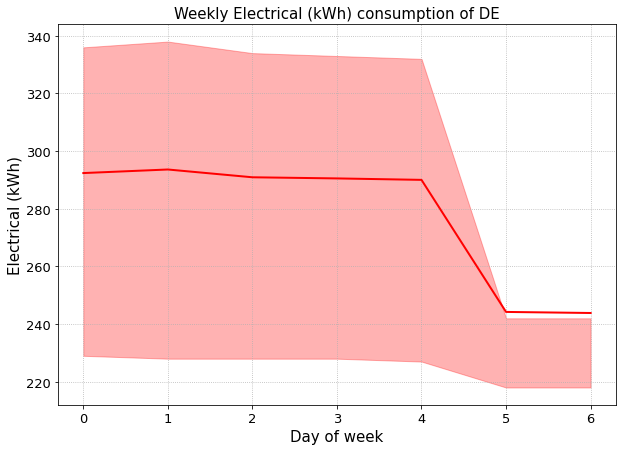

In [11]:
    df_DE_elec = df[['DE Electricity (kWh)', 'dayofweek']]
    attribute = 'Electrical (kWh)'
    dayofweek_consumption =df_DE_elec.groupby(['dayofweek']).mean()
    q25 = df_DE_elec.groupby(['dayofweek']).quantile(0.25)
    q75 = df_DE_elec.groupby(['dayofweek']).quantile(0.75)

    f, ax = plt.subplots(figsize=(10,7)) 
    dayofweek_consumption.plot(ax=ax, lw=2, color='r', legend=False)
    ax.fill_between(dayofweek_consumption.index, q25.values.ravel(), q75.values.ravel(), color='r', alpha=0.3)
    ax.grid(ls=':')
    ax.set_xlabel('Day of week', fontsize=15)
    ax.set_ylabel( attribute, fontsize=15);
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    

    ax.set_title('Weekly ' + attribute + ' consumption of DE', fontsize=15)
    plt.show()

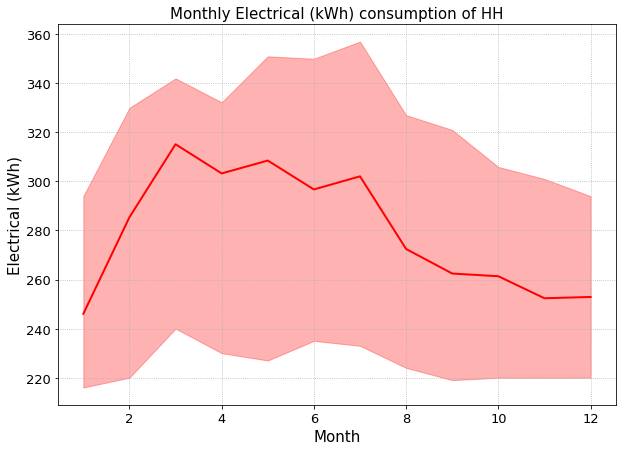

In [12]:
    df_DE_elec = df[['DE Electricity (kWh)', 'month']]
    attribute = 'Electrical (kWh)'
    dayofweek_consumption =df_DE_elec.groupby(['month']).mean()
    q25 = df_DE_elec.groupby(['month']).quantile(0.25)
    q75 = df_DE_elec.groupby(['month']).quantile(0.75)

    f, ax = plt.subplots(figsize=(10,7)) 
    dayofweek_consumption.plot(ax=ax, lw=2, color='r', legend=False)
    ax.fill_between(dayofweek_consumption.index, q25.values.ravel(), q75.values.ravel(), color='r', alpha=0.3)
    ax.grid(ls=':')
    ax.set_xlabel('Month', fontsize=15)
    ax.set_ylabel( attribute, fontsize=15);
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    

    ax.set_title('Monthly ' + attribute + ' consumption of HH', fontsize=15)
    plt.show()

Graphs look identical compared to Xenias from her report.

In [13]:
df_HH_elec = df[['HH Electrical (kWh)', 'dayofweek','hour','time']].copy()
df_HH_elec['Date'] = df.index.date
df_HH_elec

,HH Electrical (kWh),dayofweek,hour,time,Date
From Timestamp,,,,,
2018-01-01 00:00:00,12.80,0,0,00:00:00,2018-01-01
2018-01-01 00:30:00,12.30,0,0,00:30:00,2018-01-01
2018-01-01 01:00:00,13.50,0,1,01:00:00,2018-01-01
2018-01-01 01:30:00,11.90,0,1,01:30:00,2018-01-01
2018-01-01 02:00:00,12.80,0,2,02:00:00,2018-01-01
...,...,...,...,...,...
2019-12-31 21:30:00,13.56,1,21,21:30:00,2019-12-31
2019-12-31 22:00:00,13.81,1,22,22:00:00,2019-12-31
2019-12-31 22:30:00,14.12,1,22,22:30:00,2019-12-31


In [14]:
df_HH_elec_new = df_HH_elec.set_index(['Date',df_HH_elec.index])['HH Electrical (kWh)']
df_HH_elec_new

Date        From Timestamp     
2018-01-01  2018-01-01 00:00:00    12.80
            2018-01-01 00:30:00    12.30
            2018-01-01 01:00:00    13.50
            2018-01-01 01:30:00    11.90
            2018-01-01 02:00:00    12.80
                                   ...  
2019-12-31  2019-12-31 21:30:00    13.56
            2019-12-31 22:00:00    13.81
            2019-12-31 22:30:00    14.12
            2019-12-31 23:00:00    14.50
            2019-12-31 23:30:00    13.88
Name: HH Electrical (kWh), Length: 35040, dtype: float64

In [15]:
#calculating statistical features for each time segment

def stats_func(s, h1, h2, h3, h4):
    mean_list = []
    # time segments = 22:00-05:00, 05:00-10:00, 10:00-15:00,15:00-22:00
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    min_ = 10000
    max_ = 0
    max_0 = 0
    max_1 = 0
    max_2 = 0
    max_3 = 0
    for i in range(0,s.shape[0]):

        hh = s.index.get_level_values(1)[i].time().hour
        if hh < h1:
            sum_0 += s[i]
            #print("1",s[i])
            if s[i] > max_0:
                max_0 = s[i]
        elif h1 <= hh < h2:
            sum_1 += s[i] 
            #print("2",s[i])
            if s[i] > max_1:
                max_1 = s[i]
        elif h2<= hh < h3:
            sum_2 += s[i]
            #print("3",s[i])
            if s[i] > max_2:
                max_2 = s[i]
        elif h3 <= hh < h4:
            sum_3 += s[i]
            #print("4",s[i])
            if s[i] > max_3:
                max_3 = s[i]
        else: 
            sum_0 += s[i]
            #print("5",s[i])
            if s[i] > max_0:
                max_0 = s[i]
        
        #min
        if s[i] < min_:
            min_ = s[i]
        #max
        if s[i] > max_:
            max_ = s[i]
            
    ## compute means for each segment    
    mean_0 = round(sum_0/(2*(h1 + 24 - h4)),2)
    mean_1 = round(sum_1/(2*(h2-h1)),2)
    mean_2 = round(sum_2/(2*(h3-h2)),2)
    mean_3 = round(sum_3/(2*(h4-h3)),2)
    
    ## compute paek-to-valley value = (max-min)/max
    ptv = round((max_-abs(min_))/max_,2)
    
    stats_list = pd.Series([mean_0, mean_1, mean_2, mean_3, min_, max_, ptv])    
    return stats_list

In [16]:
# define time segmentations
h1=5
h2=10
h3=15
h4=22
df_HH_elec_new2 = df_HH_elec_new.groupby('Date').apply(lambda x: stats_func(x, h1, h2, h3, h4))
df_HH_elec_new2

Date         
2018-01-01  0    12.50
            1    14.14
            2    16.01
            3    14.74
            4    11.90
                 ...  
2019-12-31  2    17.68
            3    15.54
            4    13.12
            5    18.50
            6     0.29
Name: HH Electrical (kWh), Length: 5110, dtype: float64

In [17]:
#unstack multindex series to dataframe
df_HH_elec_new2 = df_HH_elec_new2.unstack(level=1)
df_HH_elec_new2

,0,1,2,3,4,5,6
Date,,,,,,,
2018-01-01,12.50,14.14,16.01,14.74,11.90,17.10,0.30
2018-01-02,13.00,17.47,25.77,18.99,12.20,26.80,0.54
2018-01-03,13.94,18.66,27.02,19.04,13.20,28.60,0.54
2018-01-04,13.02,17.94,27.11,20.40,12.10,27.90,0.57
2018-01-05,12.32,17.34,26.83,19.45,11.60,28.40,0.59
...,...,...,...,...,...,...,...
2019-12-27,14.52,18.79,21.19,17.07,13.56,23.31,0.42
2019-12-28,15.08,15.57,15.49,15.04,14.31,16.69,0.14
2019-12-29,15.08,16.50,15.87,15.75,14.31,19.62,0.27


In [18]:
col = ['Elec_mean_0', 'Elec_mean_1', 'Elec_mean_2', 'Elec_mean_3',  'Elec_min_', 'Elec_max_', 'Elec_ptv']
df_HH_elec = pd.DataFrame(df_HH_elec_new2)
df_HH_elec.columns = col
df_HH_elec

,Elec_mean_0,Elec_mean_1,Elec_mean_2,Elec_mean_3,Elec_min_,Elec_max_,Elec_ptv
Date,,,,,,,
2018-01-01,12.50,14.14,16.01,14.74,11.90,17.10,0.30
2018-01-02,13.00,17.47,25.77,18.99,12.20,26.80,0.54
2018-01-03,13.94,18.66,27.02,19.04,13.20,28.60,0.54
2018-01-04,13.02,17.94,27.11,20.40,12.10,27.90,0.57
2018-01-05,12.32,17.34,26.83,19.45,11.60,28.40,0.59
...,...,...,...,...,...,...,...
2019-12-27,14.52,18.79,21.19,17.07,13.56,23.31,0.42
2019-12-28,15.08,15.57,15.49,15.04,14.31,16.69,0.14
2019-12-29,15.08,16.50,15.87,15.75,14.31,19.62,0.27


# Dimensionality is reduced now

In [19]:
# Standardize data
scaler = MinMaxScaler() #StandardScaler()
df_HH_elec_scaled = scaler.fit_transform(df_HH_elec.values)
df_HH_elec_scaled = pd.DataFrame(df_HH_elec_scaled, index=df_HH_elec.index, columns=df_HH_elec.columns)
df_HH_elec_scaled

,Elec_mean_0,Elec_mean_1,Elec_mean_2,Elec_mean_3,Elec_min_,Elec_max_,Elec_ptv
Date,,,,,,,
2018-01-01,0.223608,0.229377,0.221355,0.213483,0.527793,0.206199,0.293333
2018-01-02,0.265170,0.406599,0.567577,0.404494,0.544638,0.527764,0.613333
2018-01-03,0.343308,0.469931,0.611919,0.406742,0.600786,0.587436,0.613333
2018-01-04,0.266833,0.431613,0.615112,0.467865,0.539023,0.564230,0.653333
2018-01-05,0.208645,0.399681,0.605179,0.425169,0.510949,0.580806,0.680000
...,...,...,...,...,...,...,...
2019-12-27,0.391521,0.476849,0.405108,0.318202,0.620999,0.412067,0.453333
2019-12-28,0.438071,0.305482,0.202909,0.226966,0.663111,0.192607,0.080000
2019-12-29,0.438071,0.354976,0.216389,0.258876,0.663111,0.289740,0.253333


In [20]:
# index = True: write row names (indexes)
df_HH_elec_scaled.to_excel('../HH_elec_Dataset_Reduced_Dimensionality.xlsx', index=True, header=True)

Now we repeat this for DE electricity

In [21]:
df_DE_elec = df[['DE Electricity (kWh)', 'hour']]
attribute = 'Electricity (kWh)'

In [22]:
df_DE_elec


,DE Electricity (kWh),hour
From Timestamp,,
2018-01-01 00:00:00,NaN,0
2018-01-01 00:30:00,NaN,0
2018-01-01 01:00:00,NaN,1
2018-01-01 01:30:00,NaN,1
2018-01-01 02:00:00,NaN,2
...,...,...
2019-12-31 21:30:00,227.0,21
2019-12-31 22:00:00,227.0,22
2019-12-31 22:30:00,226.0,22


In [23]:
df_DE_elec = df[['DE Electricity (kWh)', 'dayofweek','hour','time']].copy()
df_DE_elec['Date'] = df.index.date
df_DE_elec = df_DE_elec.set_index(['Date',df_DE_elec.index])['DE Electricity (kWh)']
df_DE_elec = df_DE_elec.dropna(inplace=False)
df_DE_elec

Date        From Timestamp     
2018-05-10  2018-05-10 09:30:00    332.0
            2018-05-10 10:00:00    332.0
            2018-05-10 10:30:00    334.0
            2018-05-10 11:00:00    334.0
            2018-05-10 11:30:00    337.0
                                   ...  
2019-12-31  2019-12-31 21:30:00    227.0
            2019-12-31 22:00:00    227.0
            2019-12-31 22:30:00    226.0
            2019-12-31 23:00:00    228.0
            2019-12-31 23:30:00    230.0
Name: DE Electricity (kWh), Length: 28829, dtype: float64

In [24]:
# define time segmentations
h1=5
h2=10
h3=15
h4=22
df_DE_elec = df_DE_elec.groupby('Date').apply(lambda x: stats_func(x, h1, h2, h3, h4))
#unstack multindex series to dataframe
df_DE_elec = df_DE_elec.unstack(level=1)
df_DE_elec

,0,1,2,3,4,5,6
Date,,,,,,,
2018-05-10,64.43,33.2,336.8,277.71,222.0,341.0,0.35
2018-05-11,225.86,277.0,334.8,278.00,217.0,340.0,0.36
2018-05-12,224.07,220.9,226.2,225.79,213.0,234.0,0.09
2018-05-13,225.21,220.6,226.8,226.36,212.0,236.0,0.10
2018-05-14,224.86,278.3,338.3,283.21,219.0,345.0,0.37
...,...,...,...,...,...,...,...
2019-12-27,226.71,272.0,297.1,261.21,225.0,302.0,0.25
2019-12-28,221.64,220.7,220.7,220.14,216.0,224.0,0.04
2019-12-29,251.93,215.5,273.0,337.93,213.0,342.0,0.38


In [25]:
col = ['Elec_mean_0', 'Elec_mean_1', 'Elec_mean_2', 'Elec_mean_3',  'Elec_min_', 'Elec_max_', 'Elec_ptv']
df_DE_elec = pd.DataFrame(df_DE_elec)
df_DE_elec.columns = col

# Standardize data
scaler = MinMaxScaler() #StandardScaler()
df_DE_elec_scaled = scaler.fit_transform(df_DE_elec.values)
df_DE_elec_scaled = pd.DataFrame(df_DE_elec_scaled, index=df_DE_elec.index, columns=df_DE_elec.columns)
df_DE_elec_scaled.head()

,Elec_mean_0,Elec_mean_1,Elec_mean_2,Elec_mean_3,Elec_min_,Elec_max_,Elec_ptv
Date,,,,,,,
2018-05-10,0.000000,0.000000,0.452274,0.313751,0.175676,0.427877,0.611111
2018-05-11,0.565865,0.663221,0.445331,0.315019,0.141892,0.424635,0.629630
2018-05-12,0.559591,0.510609,0.068379,0.086808,0.114865,0.081037,0.129630
2018-05-13,0.563587,0.509793,0.070462,0.089300,0.108108,0.087520,0.148148
2018-05-14,0.562360,0.666757,0.457480,0.337792,0.155405,0.440843,0.648148


In [26]:
# index = True: write row names (indexes)
df_DE_elec_scaled.to_excel('../DE_elec_Dataset_Reduced_Dimensionality.xlsx', index=True, header=True)

# Dataset enrichment
now we enrich our dataset with additional information such as weather holidays etc.

In [27]:
def season_of_date(date):
    month = date.month
    if 3<=month<=5:
        return 'Spring'
    elif 6<=month<=8:
        return 'Summer'
    elif 9<=month<=11:
        return 'Autumn'
    else:
        return 'Winter'

In [28]:
df_HH_elec_scaled['Weekday'] = df_HH_elec_scaled.index.map(lambda row: day_abbr[row.dayofweek])
df_HH_elec_scaled['Month'] = df_HH_elec_scaled.index.map(lambda row: month_abbr[row.month])

# season
df_HH_elec_scaled['Season'] = df_HH_elec_scaled.index.map(lambda row: season_of_date(row))
df_HH_elec_scaled.head()

,Elec_mean_0,Elec_mean_1,Elec_mean_2,Elec_mean_3,Elec_min_,Elec_max_,Elec_ptv,Weekday,Month,Season
Date,,,,,,,,,,
2018-01-01,0.223608,0.229377,0.221355,0.213483,0.527793,0.206199,0.293333,Mon,Jan,Winter
2018-01-02,0.265170,0.406599,0.567577,0.404494,0.544638,0.527764,0.613333,Tue,Jan,Winter
2018-01-03,0.343308,0.469931,0.611919,0.406742,0.600786,0.587436,0.613333,Wed,Jan,Winter
2018-01-04,0.266833,0.431613,0.615112,0.467865,0.539023,0.564230,0.653333,Thu,Jan,Winter
2018-01-05,0.208645,0.399681,0.605179,0.425169,0.510949,0.580806,0.680000,Fri,Jan,Winter


In [29]:
#Holidays

holidays_df = pd.DataFrame([], columns = ['Date','Holiday'])
ldates = []
lnames = []
for date, name in sorted(holidays.England(years=np.arange(2018, 2019 + 1)).items()):
    ldates.append(date)
    lnames.append(name)
    
ldates = np.array(ldates)
lnames = np.array(lnames)
holidays_df.loc[:,'Date'] = ldates
holidays_df.loc[:,'Holiday'] = lnames
holidays_df.Holiday.unique()

array(["New Year's Day", 'Good Friday', 'Easter Monday', 'May Day',
       'Spring Bank Holiday', 'Late Summer Bank Holiday', 'Christmas Day',
       'Boxing Day'], dtype=object)

In [30]:
holidays_df = holidays_df.set_index(['Date'])
holidays_df

,Holiday
Date,
2018-01-01,New Year's Day
2018-03-30,Good Friday
2018-04-02,Easter Monday
2018-05-07,May Day
2018-05-28,Spring Bank Holiday
2018-08-27,Late Summer Bank Holiday
2018-12-25,Christmas Day
2018-12-26,Boxing Day
2019-01-01,New Year's Day


In [31]:
df_enriched = pd.concat([df_HH_elec_scaled,holidays_df],axis=1)

# Impute null value with new category ("False")
df_enriched['Holiday'] = np.where(df_enriched['Holiday'].isnull(),"False",df_enriched['Holiday'])
df_enriched

,Elec_mean_0,Elec_mean_1,Elec_mean_2,Elec_mean_3,Elec_min_,Elec_max_,Elec_ptv,Weekday,Month,Season,Holiday
Date,,,,,,,,,,,
2018-01-01,0.223608,0.229377,0.221355,0.213483,0.527793,0.206199,0.293333,Mon,Jan,Winter,New Year's Day
2018-01-02,0.265170,0.406599,0.567577,0.404494,0.544638,0.527764,0.613333,Tue,Jan,Winter,False
2018-01-03,0.343308,0.469931,0.611919,0.406742,0.600786,0.587436,0.613333,Wed,Jan,Winter,False
2018-01-04,0.266833,0.431613,0.615112,0.467865,0.539023,0.564230,0.653333,Thu,Jan,Winter,False
2018-01-05,0.208645,0.399681,0.605179,0.425169,0.510949,0.580806,0.680000,Fri,Jan,Winter,False
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.391521,0.476849,0.405108,0.318202,0.620999,0.412067,0.453333,Fri,Dec,Winter,False
2019-12-28,0.438071,0.305482,0.202909,0.226966,0.663111,0.192607,0.080000,Sat,Dec,Winter,False
2019-12-29,0.438071,0.354976,0.216389,0.258876,0.663111,0.289740,0.253333,Sun,Dec,Winter,False


# Weather data

In [32]:
weather_df = pd.read_excel('weatherdata2018jan1-2019dec31.xlsx', usecols = [1,4,15], parse_dates=True)
weather_df = weather_df.rename(columns={weather_df.columns[0]: 'Date',
                                       weather_df.columns[1]: 'Temperature (C)',
                                       weather_df.columns[2]: 'Humidity (%)'})
weather_df=weather_df.set_index(['Date'])
weather_df.index = pd.to_datetime(weather_df.index)
weather_df.head()

,Temperature (C),Humidity (%)
Date,,
2018-01-01,6.3,82.66
2018-01-02,7.8,90.11
2018-01-03,8.3,72.91
2018-01-04,8.3,83.51
2018-01-05,5.8,83.77


In [33]:
df_enriched = pd.concat([df_enriched, weather_df],axis=1)
df_enriched.head()

,Elec_mean_0,Elec_mean_1,Elec_mean_2,Elec_mean_3,Elec_min_,Elec_max_,Elec_ptv,Weekday,Month,Season,Holiday,Temperature (C),Humidity (%)
Date,,,,,,,,,,,,,
2018-01-01,0.223608,0.229377,0.221355,0.213483,0.527793,0.206199,0.293333,Mon,Jan,Winter,New Year's Day,6.3,82.66
2018-01-02,0.265170,0.406599,0.567577,0.404494,0.544638,0.527764,0.613333,Tue,Jan,Winter,False,7.8,90.11
2018-01-03,0.343308,0.469931,0.611919,0.406742,0.600786,0.587436,0.613333,Wed,Jan,Winter,False,8.3,72.91
2018-01-04,0.266833,0.431613,0.615112,0.467865,0.539023,0.564230,0.653333,Thu,Jan,Winter,False,8.3,83.51
2018-01-05,0.208645,0.399681,0.605179,0.425169,0.510949,0.580806,0.680000,Fri,Jan,Winter,False,5.8,83.77


Xenia needed a different process for enriching with weather data since she had a different dataset. She also had NaN values to deal with which I dont.

In [34]:
df_enriched.to_excel('../EnrichedDataset.xlsx', index=True, header=True)

# Enriched dataset finished